# Importamos las librerías

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [3]:
plt.style.use("ggplot")

# Importamos los datos

In [4]:
df_1 = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Supervised Learning/Binary-Classifier-JFK-main/JFK_flights_data1.csv", index_col = 0)

In [5]:
df_2 = pd.read_csv("/Users/fernandopradagorge/Documents/Universidad/Master Data Science and AI/Nuclio Projects/Projects/Supervised Learning/Binary-Classifier-JFK-main/JFK_flights_data2.csv", index_col = 0)

In [6]:
df_1.shape

(100000, 15)

In [7]:
df_1.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
0,2018-02-01,20363.0,N299PQ,BNA,"Nashville, TN",Tennessee,JFK,"New York, NY",New York,1359,27.0,1719,0.0,140.0,765.0


In [8]:
df_2.shape

(150152, 15)

In [9]:
df_2.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
100000,2019-08-23,20363.0,N605LR,IND,"Indianapolis, IN",Indiana,JFK,"New York, NY",New York,1922,13.0,2145,0.0,143.0,665.0


In [10]:
df_3 = pd.concat([df_1, df_2], axis = 0, ignore_index = True)

In [11]:
df_3.describe()

,OP_CARRIER_AIRLINE_ID,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
count,237644.000000,250152.000000,232641.000000,250152.000000,250152.000000,250152.000000,250152.000000
mean,20152.000736,1334.611164,18.189820,1419.131404,0.210400,195.647706,1258.844866
std,297.881929,529.100385,9.609596,580.986009,0.407594,97.374339,898.116163
min,19690.000000,3.000000,1.000000,1.000000,0.000000,47.000000,94.000000
25%,19790.000000,915.000000,12.000000,944.000000,0.000000,109.000000,427.000000
50%,20363.000000,1258.000000,16.000000,1455.000000,0.000000,167.000000,1028.000000
75%,20409.000000,1744.000000,21.000000,1914.000000,0.000000,306.000000,2248.000000
max,21171.000000,2359.000000,166.000000,2400.000000,1.000000,595.000000,4983.000000


In [12]:
df_3.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250152 entries, 0 to 250151
Columns: 15 entries, FL_DATE to DISTANCE
dtypes: float64(5), int64(2), object(8)
memory usage: 28.6+ MB


In [13]:
df_3.reset_index(drop=True, inplace=True)

# Visualización de datos

In [14]:
df_3.columns

Index(['FL_DATE', 'OP_CARRIER_AIRLINE_ID', 'TAIL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_NM', 'CRS_DEP_TIME', 'TAXI_OUT', 'CRS_ARR_TIME',
       'ARR_DEL15', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')

In [15]:
df_3.head(3).T

,0,1,2
FL_DATE,2018-02-01,2018-02-01,2018-02-01
OP_CARRIER_AIRLINE_ID,20363.0,20363.0,20363.0
TAIL_NUM,N299PQ,N920XJ,N605LR
ORIGIN,BNA,RDU,BUF
ORIGIN_CITY_NAME,"Nashville, TN","Raleigh/Durham, NC","Buffalo, NY"
ORIGIN_STATE_NM,Tennessee,North Carolina,New York
DEST,JFK,JFK,JFK
DEST_CITY_NAME,"New York, NY","New York, NY","New York, NY"
DEST_STATE_NM,New York,New York,New York
CRS_DEP_TIME,1359,1354,1529


In [16]:
TARGET = "ARR_DEL15"

# Data Understanding

## Estadísticos descriptivos

In [17]:
df_3.describe().T

,count,mean,std,min,25%,50%,75%,max
OP_CARRIER_AIRLINE_ID,237644.0,20152.000736,297.881929,19690.0,19790.0,20363.0,20409.0,21171.0
CRS_DEP_TIME,250152.0,1334.611164,529.100385,3.0,915.0,1258.0,1744.0,2359.0
TAXI_OUT,232641.0,18.189820,9.609596,1.0,12.0,16.0,21.0,166.0
CRS_ARR_TIME,250152.0,1419.131404,580.986009,1.0,944.0,1455.0,1914.0,2400.0
ARR_DEL15,250152.0,0.210400,0.407594,0.0,0.0,0.0,0.0,1.0
CRS_ELAPSED_TIME,250152.0,195.647706,97.374339,47.0,109.0,167.0,306.0,595.0
DISTANCE,250152.0,1258.844866,898.116163,94.0,427.0,1028.0,2248.0,4983.0


In [19]:
df_3.describe(include=["object"]).T

,count,unique,top,freq
FL_DATE,250152,730,2018-07-19,394
TAIL_NUM,235143,2645,N110AN,761
ORIGIN,250152,72,LAX,25345
ORIGIN_CITY_NAME,250152,70,"Los Angeles, CA",25345
ORIGIN_STATE_NM,250152,32,California,51137
DEST,250152,1,JFK,250152
DEST_CITY_NAME,250152,1,"New York, NY",250152
DEST_STATE_NM,250152,1,New York,250152


# Número de Nulos

In [20]:
df_3.select_dtypes(include=["object"]).isnull().sum()

FL_DATE                 0
TAIL_NUM            15009
ORIGIN                  0
ORIGIN_CITY_NAME        0
ORIGIN_STATE_NM         0
DEST                    0
DEST_CITY_NAME          0
DEST_STATE_NM           0
dtype: int64

In [21]:
df_3.select_dtypes(exclude=["object"]).isnull().sum()

OP_CARRIER_AIRLINE_ID    12508
CRS_DEP_TIME                 0
TAXI_OUT                 17511
CRS_ARR_TIME                 0
ARR_DEL15                    0
CRS_ELAPSED_TIME             0
DISTANCE                     0
dtype: int64

# Distribución del TARGET

In [23]:
df_3[TARGET].mean()

0.21040007675333397

# Exploración de variables

## Fechas

In [25]:
LAX_df = df_3[df_3["ORIGIN"] == "LAX"]

In [26]:
LAX_df.head(1)

,FL_DATE,OP_CARRIER_AIRLINE_ID,TAIL_NUM,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST,DEST_CITY_NAME,DEST_STATE_NM,CRS_DEP_TIME,TAXI_OUT,CRS_ARR_TIME,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE
34,2018-02-01,19805.0,N104NN,LAX,"Los Angeles, CA",California,JFK,"New York, NY",New York,1530,40.0,2359,1.0,329.0,2475.0


In [27]:
LAX_df_dia = LAX_df[["FL_DATE", TARGET]].groupby("FL_DATE").mean()

In [28]:
LAX_df_dia.head(15)

,ARR_DEL15
FL_DATE,
2018-01-01,0.322581
2018-01-02,0.371429
2018-01-03,0.107143
2018-01-04,0.500000
2018-01-05,0.724138
2018-01-06,0.636364
2018-01-07,0.694444
2018-01-08,0.485714
2018-01-09,0.135135


In [30]:
LAX_df_dia.index

Index(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
       '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09', '2018-01-10',
       ...
       '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26',
       '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31'],
      dtype='object', name='FL_DATE', length=730)

In [31]:
LAX_df_dia.index = pd.to_datetime(LAX_df_dia.index)

<Axes: xlabel='FL_DATE'>

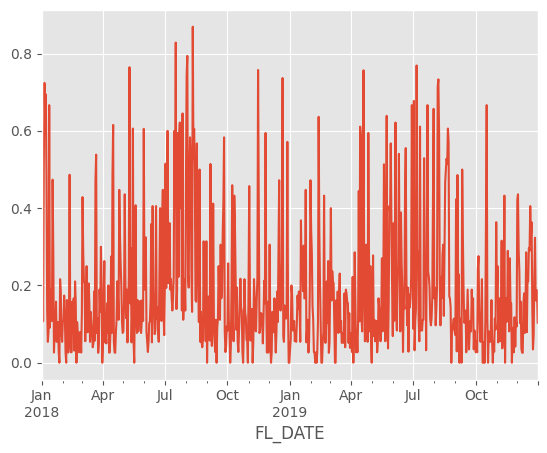

In [32]:
LAX_df_dia[TARGET].plot()

In [33]:
media_retrasos_semana = LAX_df_dia[TARGET].resample("M").mean()

<Axes: xlabel='FL_DATE'>

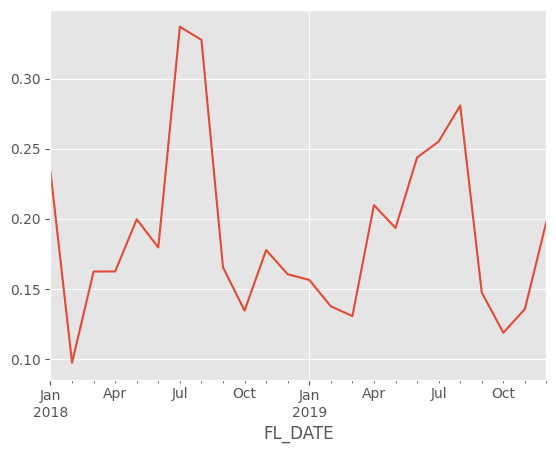

In [34]:
media_retrasos_semana.plot()

In [35]:
#Conclusiones:

#Verano y navidad hay mas retrasos
#Febrero es un mes con pocos retrasos

In [36]:
#Data preparation:

#Extraer mes, año, día, trimestre, semana

# Análisis Variables Numéricas

<Axes: ylabel='Frequency'>

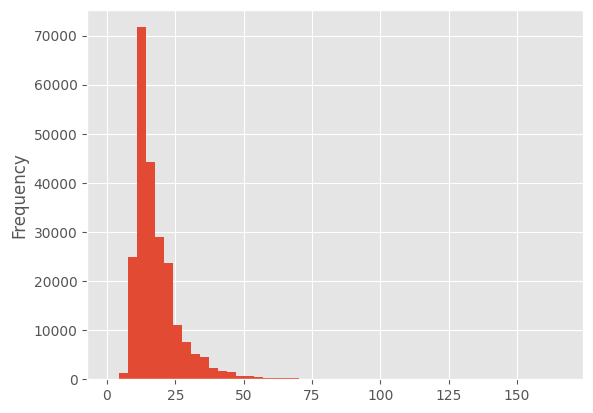

In [38]:
#Data Preparation
df_3["TAXI_OUT"].plot(kind="hist", bins = 50)

In [39]:
#Como se relaciona la variable target. ¿Es informativa?

<Axes: xlabel='ARR_DEL15', ylabel='TAXI_OUT'>

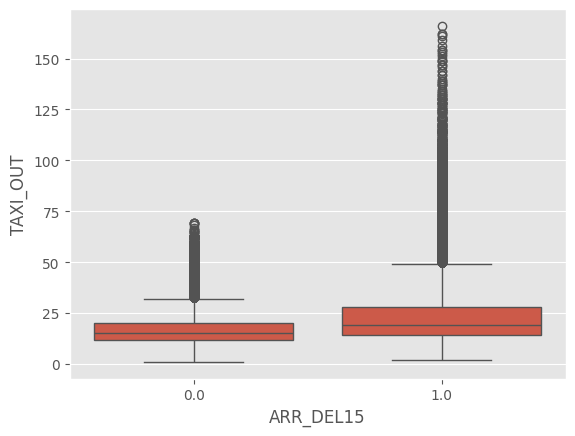

In [40]:
sns.boxplot(data = df_3, x = TARGET, y = "TAXI_OUT")

<Axes: ylabel='Frequency'>

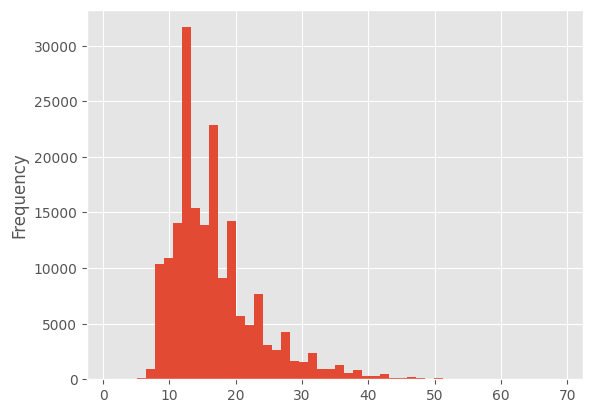

In [41]:
df_3[df_3[TARGET] == 0]["TAXI_OUT"].plot(kind="hist", bins = 50)

<Axes: ylabel='Frequency'>

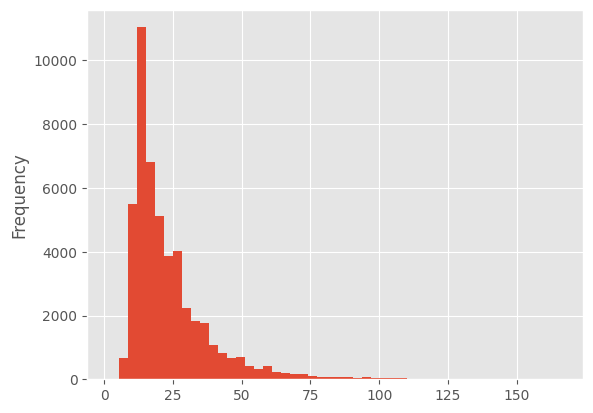

In [42]:
df_3[df_3[TARGET] == 1]["TAXI_OUT"].plot(kind="hist", bins = 50)